In [31]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

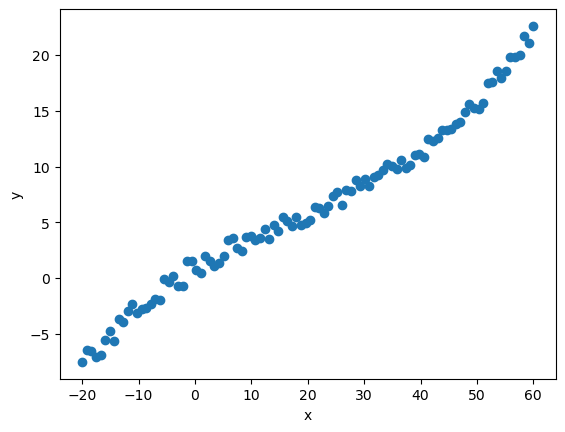

In [32]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)


x = data[:, 0]
y = data[:, 1]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [33]:
def h_fun(x, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag
    '''
    return theta_0 + x * theta_1

def calculate_cost(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    '''
    m = len(x)
    return np.sum((h_fun(x, theta_0, theta_1) - y) ** 2) / (2 * m)

def gradient_descent(x, y, theta_0, theta_1, eps, alpha):
    previous_cost = calculate_cost(x, y, theta_0, theta_1)
    m = len(x)
    cost_diff = 1
    
    while cost_diff > eps:
        predictions = h_fun(x, theta_0, theta_1)
        error = predictions - y

        theta_0 -= alpha * (1 / m) * np.sum(error)
        theta_1 -= alpha * (1 / m) * np.sum(error * x)

        current_cost = calculate_cost(x, y, theta_0, theta_1)
        cost_diff = abs(current_cost - previous_cost)
        previous_cost = current_cost

    return theta_0, theta_1, current_cost


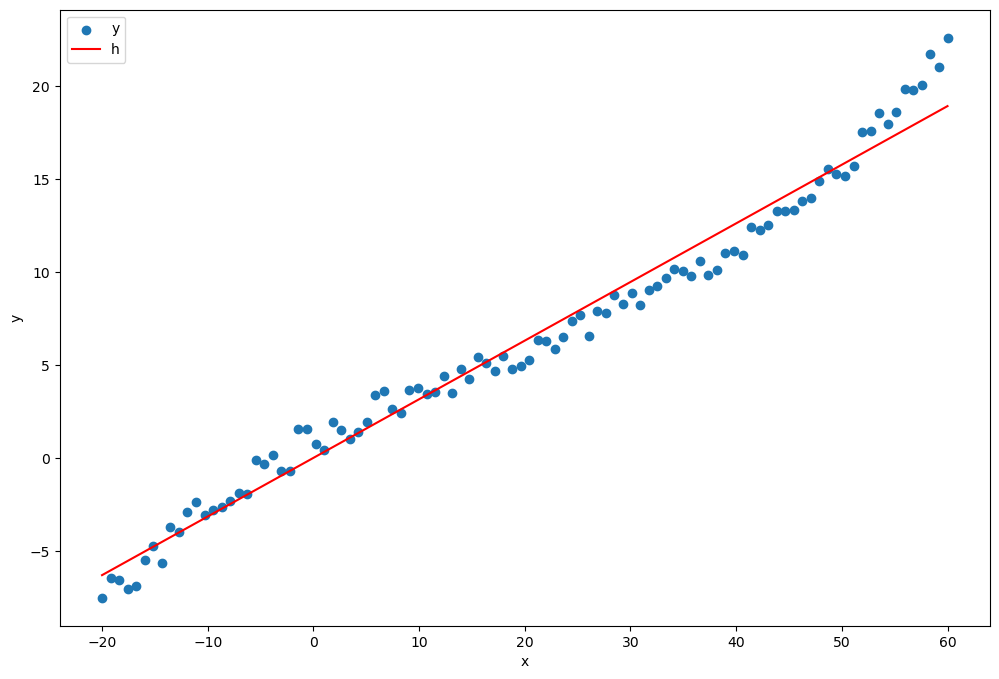

theta_0 = 0.0065
theta_1 = 0.3154
J = 0.6392


In [34]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

theta_0, theta_1, cost = gradient_descent(x, y, theta_0, theta_1, eps, alpha)

f = theta_0 + theta_1 * x

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x,y)
ax.plot(x, f, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y', 'h'])
plt.show()

print(f"theta_0 = {theta_0:.4f}")
print(f"theta_1 = {theta_1:.4f}")
print(f"J = {cost:.4f}")

# Regresja liniowa wielu zmiennych

In [35]:
X = np.vstack([np.ones(x.shape), x])
y.shape = [1, -1]

display(y.shape)
display(X.shape)

(1, 100)

(2, 100)

In [36]:
def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return np.dot(theta.T,X)
 
def calculate_cost(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = X.shape[1]
    return np.sum((h_fun(X, theta) - y) ** 2) / (2 * m)

def gradient_descent(X, y, theta, eps, alpha):
    previous_cost = calculate_cost(X, y, theta)
    m = X.shape[1]
    cost_diff = 1
    
    while cost_diff > eps:
        predictions = h_fun(X, theta)
        error = predictions - y

        theta -= alpha * (1 / m) * np.dot(X, error.T)

        current_cost = calculate_cost(X, y, theta)
        cost_diff = abs(current_cost - previous_cost)
        previous_cost = current_cost

    return theta, current_cost

In [ ]:
theta = np.array([[0.], [0.]])
h_fun(X, theta).shape

(1, 100)

In [38]:
with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)
    y = data2[:, 2]
    y.shape = [1, y.shape[0]]
    X = data2[:, 0:2]
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T
    theta = np.array([[0.],[0.],[0.]])


y_scale = y.max()
y = y / y_scale

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale

theta, cost = gradient_descent(X, y, theta, eps, alpha)

example = np.array([[1], [1300], [4]])
h_example = theta.T @ (example/X_scale) * y_scale
print(f'koszt nieruchomosi o pow. {example[1][0]} z l. pok. {example[2][0]} oszacowany na {h_example[0][0]}')

koszt nieruchomosi o pow. 1300 z l. pok. 4 oszacowany na 296090.6397107442


# Regresja wielomianowa

In [39]:
x = data[:, 0]
y = data[:, 1]

X = np.vstack([np.ones(x.shape), x, x**2, x**3])

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale
 
y.shape = [1, -1]
y_scale = y.max()
y = y / y_scale

eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0], [0], [0]])
h = h_fun(X, theta)

display(y.shape)
display(X.shape)
display(theta.shape)
display(h.shape)

(1, 100)

(4, 100)

(4, 1)

(1, 100)

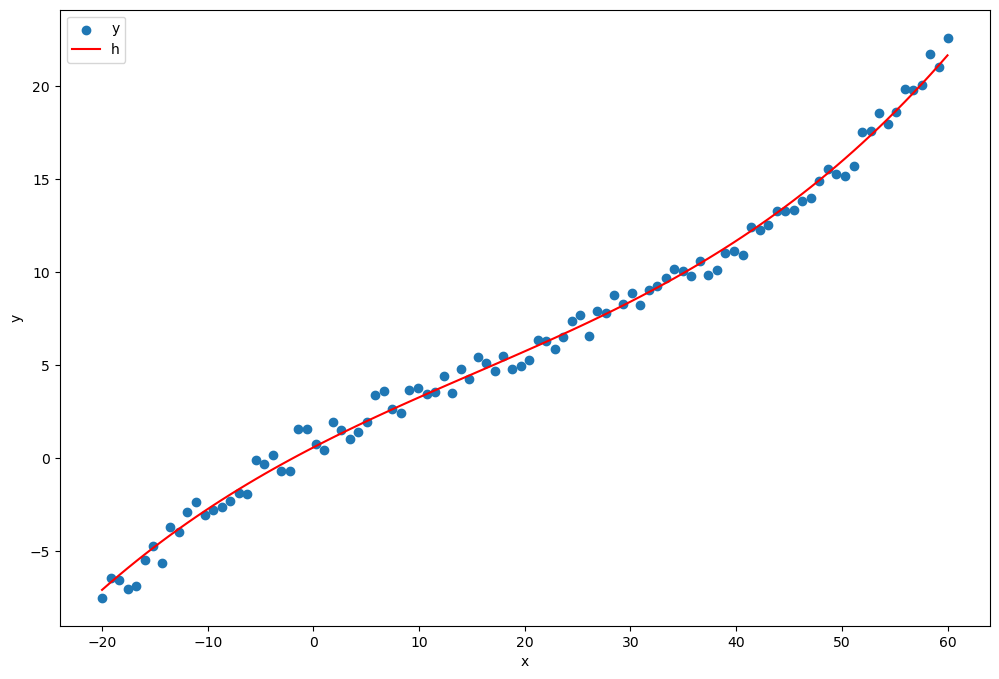

In [41]:
theta = theta.astype(np.float64)
theta, cost = gradient_descent(X, y, theta, eps, alpha)
h = h_fun(X, theta)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x, y * y_scale)
ax.plot(x, h.flatten() * y_scale, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y', 'h'])
plt.show()

In [42]:
display(theta)

array([[ 0.02528658],
       [ 0.77921902],
       [-0.49718083],
       [ 0.65075679]])